In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
test = tf.keras.models.load_model('my_model_1')

In [3]:
Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

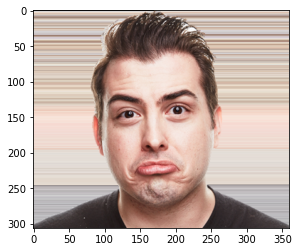

In [4]:
img  = cv2.imread('./sad2.png')
img.shape
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(306, 360)

In [6]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h, x:x+w]
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("no face detected")
    else:
        print('ok')
        for (ex,ey,ew,eh) in facess:
            face_roi  = roi_color[ey:ey+eh,ex:ex+ew]

ok


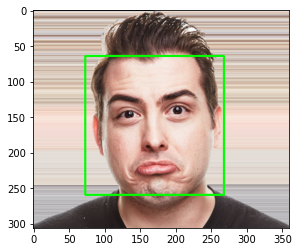

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

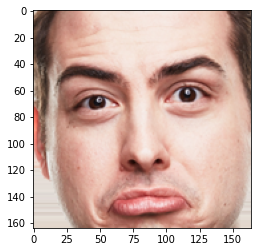

In [8]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [9]:
final_img  = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis = 0)  #add fourth dimension
final_img = final_img/255.0

In [10]:
Predictions = test.predict(final_img)
Predictions[0]

array([1.0051080e-05, 1.1598736e-05, 7.3506945e-04, 2.4526664e-03,
       2.4497865e-01, 1.1317454e-06, 7.5181079e-01], dtype=float32)

In [11]:
ind = np.argmax(Predictions)
print(Classes[ind])

surprise
